In [1]:
import os
import random
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
#loading EmotionLookupTable
elt = pd.read_csv(r'\analysis\critic_model\sentiment_analysis\EmotionLookupTable.txt', delimiter = "\t")

#loading Metacritic dataset
metacritic = pd.read_csv(r'\metacritic.csv')

#loading sentimentscores
sentimentscores = pd.read_csv(r'\analysis\user_model\sentiment_analysis\sentimentscores_userreviews.csv')

#Loading Innovativeness scores
innovativenesscores = pd.read_csv(r'\analysis\user_model\innovativeness_analysis\innovativeness_score_userreviews.csv')

#Loading Metacritic dataset LDA-analysis
data = pd.read_csv(r'\metacritic.csv')

#Loading VGChartz videogame sales
sales_data = pd.read_csv(r'\vgchartz.csv')

# Adjusting EmotionLookupTable

In [3]:
elt = elt[['word', 'weight']] 

In [4]:
elt['word'] = elt['word'].str.replace('*', '')

In [5]:
# ALREADY CREATED
#elt.to_excel(r'C:\Users\B.R\Documents\HvA\Master_DDB\MP\analysis\user_model\sentiment_analysis\EmotionLookupTable.xlsx')

# Sentiment scores

In [8]:
metacritic.columns

Index(['Game', 'Metascore', 'UserScore', 'Publisher', 'ReleaseDate', 'Genre',
       'NumberOfOnlinePlayers', 'Cast', 'Credits', 'CriticsReviews',
       'UserReviews'],
      dtype='object')

In [9]:
#Drop NAN
metacritic = metacritic[metacritic['UserReviews'].notna()]

In [10]:
#Check dataset
metacritic['UserReviews']

0        [{'UserName': None, 'UserReviewScore': '75', '...
1        [{'UserName': None, 'UserReviewScore': '70', '...
2        [{'UserName': None, 'UserReviewScore': '80', '...
3        [{'UserName': None, 'UserReviewScore': '60', '...
4        [{'UserName': None, 'UserReviewScore': '70', '...
                               ...                        
49825    [{'UserName': None, 'UserReviewScore': '85', '...
49850    [{'UserName': None, 'UserReviewScore': '60', '...
49860    [{'UserName': None, 'UserReviewScore': '30', '...
49866    [{'UserName': None, 'UserReviewScore': '85', '...
49874    [{'UserName': None, 'UserReviewScore': '90', '...
Name: UserReviews, Length: 25485, dtype: object

In [11]:
#Lower case reviews
metacritic['UserReviews'] = metacritic['UserReviews'].str.lower()

In [12]:
#Remove stopwords
stop = stopwords.words('english')
metacritic['UserReviews'] = metacritic['UserReviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [13]:
#Create new dataset
sentiment_data = metacritic[['Game', 'UserReviews']]
sentiment_data

,Game,UserReviews
0,Subnautica: Below Zero,"[{'username': none, 'userreviewscore': '75', '..."
1,AntVentor,"[{'username': none, 'userreviewscore': '70', '..."
2,Pilotwings 64,"[{'username': none, 'userreviewscore': '80', '..."
3,Wave Race 64,"[{'username': none, 'userreviewscore': '60', '..."
4,Madden NFL 08,"[{'username': none, 'userreviewscore': '70', '..."
...,...,...
49825,GORN,"[{'username': none, 'userreviewscore': '85', '..."
49850,Citizens of Space,"[{'username': none, 'userreviewscore': '60', '..."
49860,Bear With Me: The Lost Robots,"[{'username': none, 'userreviewscore': '30', '..."
49866,Journey,"[{'username': none, 'userreviewscore': '85', '..."


In [14]:
#Split reviews into rows
sentiment_data = sentiment_data.drop('UserReviews', axis=1).join(sentiment_data['UserReviews'].str.split(']', expand=True).stack().reset_index(level=1, drop=True).rename('UserReviews'))

In [15]:
#Drop columns with NaN
sentiment_data['UserReviews'] = sentiment_data['UserReviews'].dropna()

In [16]:
#Drop empty columns
sentiment_data = sentiment_data[sentiment_data.UserReviews != '']

In [17]:
#Check dataset
sentiment_data

,Game,UserReviews
0,Subnautica: Below Zero,"[{'username': none, 'userreviewscore': '75', '..."
1,AntVentor,"[{'username': none, 'userreviewscore': '70', '..."
2,Pilotwings 64,"[{'username': none, 'userreviewscore': '80', '..."
3,Wave Race 64,"[{'username': none, 'userreviewscore': '60', '..."
4,Madden NFL 08,"[{'username': none, 'userreviewscore': '70', '..."
...,...,...
49825,GORN,"[{'username': none, 'userreviewscore': '85', '..."
49850,Citizens of Space,"[{'username': none, 'userreviewscore': '60', '..."
49860,Bear With Me: The Lost Robots,"[{'username': none, 'userreviewscore': '30', '..."
49866,Journey,"[{'username': none, 'userreviewscore': '85', '..."


In [18]:
#DATASET IS CREATED ALREADY
#Create xlsx for sentiment analysis
#sentiment_data.to_excel(r'C:\Users\B.R\Documents\HvA\Master_DDB\MP\complete_model\sentiment_analysis\seperated_userreviews.xlsx')

In [19]:
#Loading sentiment scores
sentimentscores.head()

,Game,StdDev_Sentiment,TotalNegative,TotalPositive,StdDev_ContainWord
0,"""Aha! I Found It!"" Hidden Object Game",14,4,8,0.126883
1,"""Aha! I Got It!"" Escape Game",0,4,4,0.079282
2,#Breakforcist Battle,0,4,4,0.079282
3,#DRIVE,0,4,4,0.079282
4,#Funtime,0,12,12,0.079277


# Innovativeness scores

In [20]:
innovativenesscores.head()

,Game,Total_innovativeness,StdDev_innovativeness
0,"""Aha! I Found It!"" Hidden Object Game",0,0.0
1,"""Aha! I Got It!"" Escape Game",0,0.0
2,#Breakforcist Battle,0,0.0
3,#DRIVE,0,0.0
4,#Funtime,0,0.0


# LDA Topic analysis

In [21]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\B.R\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
data.reset_index(inplace=True)
data.columns

Index(['index', 'Game', 'Metascore', 'UserScore', 'Publisher', 'ReleaseDate',
       'Genre', 'NumberOfOnlinePlayers', 'Cast', 'Credits', 'CriticsReviews',
       'UserReviews'],
      dtype='object')

In [24]:
# let's see how many na values we have
print(data['UserReviews'].isnull().sum())
print(data['UserReviews'].isna().sum())
# we drop the rows that we don't need
data = data[data['UserReviews'].notna()]

24401
24401


In [25]:
# make sure all data is clean and ready to work on
print(data['UserReviews'].isnull().sum())
print(data['UserReviews'].isna().sum())

0
0


In [26]:
#Split review information into seperate columns
import json
reviews = pd.DataFrame()
for index, row in data.iterrows():
    print(index)
    critic = row['UserReviews']
    critic = critic.replace("\'", "\"")
    critic = critic.replace("\'None\'", "")
    critic = critic.replace('None,', "\"\",")
    try:
      j = json.loads(critic)
    except Exception as msg:
      print("**INEXCEPT")
      reviews = reviews.append({'index': row['index']}, ignore_index=True)
      continue
    j[0]['index'] = row['index']
    # Convert to pandas dataframe:
    dataframe = pd.DataFrame.from_dict(j, orient="columns")
    reviews = reviews.append(dataframe, ignore_index=False)

379
31380
31381
31382
31383
31384
31385
31386
31387
31388
31389
31390
31391
31392
31393
31394
31395
31396
31397
31398
31399
31400
31401
31402
31403
31405
31406
31407
31408
31409
31410
31411
31412
31413
31416
31417
31418
31419
31420
31422
31423
31424
31425
31426
31428
31430
31431
31432
31434
31437
31438
31440
31441
31442
31443
31444
31445
31446
31447
31448
31449
31450
31451
31453
31454
31455
31457
31458
31459
31460
31461
31463
31464
31465
31466
31467
31468
31469
31470
31471
31472
31473
31474
31475
31476
31477
31479
31480
31481
31482
31483
31484
31485
31486
31487
31488
31491
31492
31493
31494
31496
31498
31499
31500
31501
31502
31503
31504
31505
31508
31509
31510
31511
31512
31513
31514
31515
31516
31517
31518
31519
31521
31522
31523
31524
31525
31526
31527
31528
31529
31530
31531
31532
31533
31534
31535
31536
31537
31538
31539
31540
31541
31542
31543
**INEXCEPT
31544
31545
31546
31547
31548
31549
31550
31551
31553
31554
31556
31557
31558
31559
31560
31561
31562
31563
31564
31565
31566
3

In [27]:
df = pd.merge(reviews, data, on='index', how='outer')
df.head()

,UserName,UserReviewScore,UserReviewDate,UserReviewText,ExpandedUserReviewText,TotalThumbsUp,TotalThumbs,index,Game,Metascore,UserScore,Publisher,ReleaseDate,Genre,NumberOfOnlinePlayers,Cast,Credits,CriticsReviews,UserReviews
0,,75,"May 17, 2021",None,None,None,None,0.0,Subnautica: Below Zero,NaN,NaN,Bandai Namco Games,"May 14, 2021","ActionAdventure,Adventure,General,Sandbox",NaN,NaN,NaN,"[{'CriticName': None, 'CriticScore': '75', 'Cr...","[{'UserName': None, 'UserReviewScore': '75', '..."
1,,70,"Apr 22, 2021",None,None,None,None,1.0,AntVentor,NaN,NaN,LoopyMood,"Apr 23, 2021",NaN,NaN,NaN,NaN,"[{'CriticName': None, 'CriticScore': '70', 'Cr...","[{'UserName': None, 'UserReviewScore': '70', '..."
2,,80,,"An amazingly relaxing experience- the music, t...",None,1,1,2.0,Pilotwings 64,80.0,NaN,Nintendo,"Sep 29, 1996","Simulation,General",1Player,"ShigeruMiyamoto , MakotoWada , YasuyukiOyagi","Designer , Director , CoDirector","[{'CriticName': 'Electronic Gaming Monthly', '...","[{'UserName': None, 'UserReviewScore': '80', '..."
3,,60,,Perhaps the best racing game on Nintendo 64; I...,None,3,3,3.0,Wave Race 64,92.0,NaN,Nintendo,"Nov 1, 1996","Driving,Racing,Snow/Water",1-2Players,"ShigeruMiyamoto , HiroshiYamauchi","Designer , Director","[{'CriticName': None, 'CriticScore': '100', 'C...","[{'UserName': None, 'UserReviewScore': '60', '..."
4,,70,,"Game of the year, EVERY YEAR! John would be v...",None,0,0,4.0,Madden NFL 08,75.0,NaN,EA Sports,"Aug 14, 2007",EATiburon,"Sports,Traditional,Football,Sim",Himself,VoiceActor:JohnMadden,"[{'CriticName': None, 'CriticScore': '80', 'Cr...","[{'UserName': None, 'UserReviewScore': '70', '..."


In [28]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            25475, 25476, 25477, 25478, 25479, 25480, 25481, 25482, 25483,
            25484],
           dtype='int64', length=25485)

In [29]:
data = df
data_text = data[['Game', 'UserReviewText', 'UserScore']]
data_text['index'] = data_text.index
documents = data_text

<ipython-input-29-2cb23fd5e45c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index'] = data_text.index


In [30]:
len(documents)

25485

In [31]:
documents[:5]

,Game,UserReviewText,UserScore,index
0,Subnautica: Below Zero,None,NaN,0
1,AntVentor,None,NaN,1
2,Pilotwings 64,"An amazingly relaxing experience- the music, t...",NaN,2
3,Wave Race 64,Perhaps the best racing game on Nintendo 64; I...,NaN,3
4,Madden NFL 08,"Game of the year, EVERY YEAR! John would be v...",NaN,4


### Lemmatize example

In [32]:
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


## Data Preprocessing

### Stemmer Example

In [33]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [34]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [35]:
documents

,Game,UserReviewText,UserScore,index
0,Subnautica: Below Zero,None,NaN,0
1,AntVentor,None,NaN,1
2,Pilotwings 64,"An amazingly relaxing experience- the music, t...",NaN,2
3,Wave Race 64,Perhaps the best racing game on Nintendo 64; I...,NaN,3
4,Madden NFL 08,"Game of the year, EVERY YEAR! John would be v...",NaN,4
...,...,...,...,...
25480,GORN,This game makes VR worth having. Great perform...,7.1,25480
25481,Citizens of Space,None,NaN,25481
25482,Bear With Me: The Lost Robots,None,NaN,25482
25483,Journey,,NaN,25483


In [36]:
doc_sample = documents[documents['index'] == 4310].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Kingdom', 'of', 'Arcadia']


 tokenized and lemmatized document: 
['kingdom', 'arcadia']


In [37]:
#delete empty rows
documents = documents[documents.UserReviewText != '']

In [38]:
processed_docs = documents['UserReviewText'].astype(str).map(preprocess)

In [39]:
processed_docs[:10]

0                                                    []
1                                                    []
2     [amaz, relax, experi, music, sens, flight, cha...
3     [best, race, game, nintendo, wish, cours, game...
4     [game, year, year, john, proud, work, awesom, ...
6     [best, basebal, game, easi, play, easi, homer,...
7                                                    []
8                                      [graphic, great]
14       [get, bore, quick, short, stiff, hghgghhhhhgh]
15                                                   []
Name: UserReviewText, dtype: object

## Bag of words on the dataset

In [40]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [41]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 amaz
1 chang
2 experi
3 fli
4 flight
5 hope
6 like
7 love
8 match
9 mayb
10 music


In [42]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [43]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(5, 1), (19, 1), (33, 1), (181, 1), (209, 1), (368, 1), (449, 1), (628, 1)]

In [44]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 5 ("like") appears 1 time.
Word 19 ("game") appears 1 time.
Word 33 ("great") appears 1 time.
Word 181 ("challeng") appears 1 time.
Word 209 ("feel") appears 1 time.
Word 368 ("actual") appears 1 time.
Word 449 ("smooth") appears 1 time.
Word 628 ("believ") appears 1 time.


## TF-IDF

In [45]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [46]:
corpus_tfidf = tfidf[bow_corpus]

In [47]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[]


## Running LDA using TF-IDF

In [48]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [49]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.108*"game" + 0.043*"great" + 0.018*"good" + 0.016*"like" + 0.014*"graphic" + 0.014*"stori" + 0.013*"gameplay" + 0.012*"play" + 0.009*"better" + 0.009*"look"
Topic: 1 
Words: 0.154*"game" + 0.041*"play" + 0.036*"best" + 0.030*"great" + 0.023*"love" + 0.021*"like" + 0.014*"graphic" + 0.012*"good" + 0.012*"stori" + 0.010*"amaz"
Topic: 2 
Words: 0.081*"game" + 0.017*"great" + 0.013*"combat" + 0.012*"stori" + 0.012*"gameplay" + 0.011*"play" + 0.010*"graphic" + 0.010*"feel" + 0.010*"enjoy" + 0.010*"amaz"
Topic: 3 
Words: 0.093*"game" + 0.043*"play" + 0.021*"want" + 0.021*"like" + 0.020*"gameplay" + 0.018*"graphic" + 0.016*"long" + 0.012*"time" + 0.009*"charact" + 0.009*"worth"
Topic: 4 
Words: 0.095*"game" + 0.018*"like" + 0.017*"play" + 0.014*"time" + 0.012*"good" + 0.012*"player" + 0.011*"great" + 0.010*"multiplay" + 0.010*"onlin" + 0.009*"graphic"
Topic: 5 
Words: 0.092*"game" + 0.026*"play" + 0.014*"great" + 0.012*"gameplay" + 0.010*"time" + 0.009*"player" + 0.009*"bor

## Performance evaluation by classifying sample document using LDA Bag of Words model

In [50]:
processed_docs[4310]

[]

In [51]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.8999714255332947	 
Topic: 0.154*"game" + 0.041*"play" + 0.036*"best" + 0.030*"great" + 0.023*"love" + 0.021*"like" + 0.014*"graphic" + 0.012*"good" + 0.012*"stori" + 0.010*"amaz"

Score: 0.011115213856101036	 
Topic: 0.092*"game" + 0.026*"play" + 0.014*"great" + 0.012*"gameplay" + 0.010*"time" + 0.009*"player" + 0.009*"bore" + 0.009*"worth" + 0.009*"experi" + 0.009*"good"

Score: 0.011114493012428284	 
Topic: 0.143*"game" + 0.043*"play" + 0.030*"like" + 0.021*"good" + 0.018*"think" + 0.012*"need" + 0.010*"look" + 0.009*"know" + 0.008*"review" + 0.008*"gameplay"

Score: 0.011114339344203472	 
Topic: 0.093*"game" + 0.043*"play" + 0.021*"want" + 0.021*"like" + 0.020*"gameplay" + 0.018*"graphic" + 0.016*"long" + 0.012*"time" + 0.009*"charact" + 0.009*"worth"

Score: 0.011114321649074554	 
Topic: 0.081*"game" + 0.017*"great" + 0.013*"combat" + 0.012*"stori" + 0.012*"gameplay" + 0.011*"play" + 0.010*"graphic" + 0.010*"feel" + 0.010*"enjoy" + 0.010*"amaz"

Score: 0.01111428719013929

## Testing model on unseen document

In [52]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.5499029755592346	 Topic: 0.092*"game" + 0.026*"play" + 0.014*"great" + 0.012*"gameplay" + 0.010*"time"
Score: 0.050019800662994385	 Topic: 0.108*"game" + 0.043*"great" + 0.018*"good" + 0.016*"like" + 0.014*"graphic"
Score: 0.0500158965587616	 Topic: 0.078*"game" + 0.028*"control" + 0.028*"great" + 0.024*"play" + 0.020*"time"
Score: 0.05001331865787506	 Topic: 0.084*"game" + 0.025*"play" + 0.020*"better" + 0.018*"juego" + 0.017*"good"
Score: 0.0500103235244751	 Topic: 0.095*"game" + 0.018*"like" + 0.017*"play" + 0.014*"time" + 0.012*"good"
Score: 0.050009045749902725	 Topic: 0.154*"game" + 0.041*"play" + 0.036*"best" + 0.030*"great" + 0.023*"love"
Score: 0.050008077174425125	 Topic: 0.143*"game" + 0.043*"play" + 0.030*"like" + 0.021*"good" + 0.018*"think"
Score: 0.05000775679945946	 Topic: 0.095*"game" + 0.056*"good" + 0.022*"level" + 0.020*"like" + 0.020*"play"
Score: 0.05000670254230499	 Topic: 0.093*"game" + 0.043*"play" + 0.021*"want" + 0.021*"like" + 0.020*"gameplay"
Score

## Identifying the most dominant topic within reviews

In [53]:
def format_topics_sentences(ldamodel=None, corpus=bow_corpus, texts=documents['UserReviewText']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [54]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=documents['UserReviewText'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.1000,"game, great, good, like, graphic, stori, gamep...",None
1,1,0.0,0.1000,"game, great, good, like, graphic, stori, gamep...",None
2,2,7.0,0.4415,"game, control, great, play, time, like, graphi...","An amazingly relaxing experience- the music, t..."
3,3,7.0,0.9250,"game, control, great, play, time, like, graphi...",Perhaps the best racing game on Nintendo 64; I...
4,4,1.0,0.8714,"game, play, best, great, love, like, graphic, ...","Game of the year, EVERY YEAR! John would be v..."
5,5,1.0,0.4779,"game, play, best, great, love, like, graphic, ...",NaN
6,6,0.0,0.1000,"game, great, good, like, graphic, stori, gamep...",Best PS1 baseball game ever!!! Easy to play bu...
7,7,0.0,0.6999,"game, great, good, like, graphic, stori, gamep...",None
8,8,4.0,0.8200,"game, like, play, time, good, player, great, m...",The graphics are great.
9,9,0.0,0.1000,"game, great, good, like, graphic, stori, gamep...",NaN


# Merging data analysis outcome

In [56]:
sales_data.head()

,Game,Platform,Publisher,VGChartzScore,CriticScore,TotalSales,ReleaseDate,LastUpdate
0,Grand Theft Auto: Liberty City Stories,PSP,Rockstar Games,N/A,8.8,7.72m,25th Oct 05,NaN
1,Grand Theft Auto: Vice City Stories,PSP,Rockstar Games,N/A,8.4,5.08m,31st Oct 06,NaN
2,Monster Hunter Freedom 3,PSP,Capcom,N/A,N/A,4.87m,01st Dec 10,08th Jan 19
3,Gran Turismo,PSP,Sony Computer Entertainment,7.5,7.7,2.93m,01st Oct 09,NaN
4,Monster Hunter Freedom Unite,PSP,Capcom,N/A,7.7,5.50m,23rd Jun 09,NaN


In [57]:
#merging sales data with metacritic reviews
merge_sales = pd.merge(documents, sales_data, on='Game', how='left')

In [58]:
#merging topic dominance scores
topicsales = merge_sales.merge(df_dominant_topic, left_index=True, right_index=True)

In [59]:
#merging sentimentscores
sentisales = pd.merge(topicsales, sentimentscores, on='Game', how='left')

In [60]:
#merging innovativeness scores
finaldata = pd.merge(innovativenesscores, sentisales, on='Game', how='left')

In [61]:
#Drop NaNs for the regression
finaldata.dropna(subset = ['StdDev_ContainWord', 'Total_innovativeness', 'Topic_Perc_Contrib', 'UserScore', 'TotalSales'], inplace=True)

In [62]:
#Removing letter M from sales
finaldata['TotalSales'] = finaldata['TotalSales'].map(lambda x: x.rstrip('m'))

In [63]:
#validation on null data and NaNs in dataset
print(finaldata[['StdDev_ContainWord', 'Total_innovativeness', 'Topic_Perc_Contrib', 'UserScore', 'TotalSales']].isnull().sum())
print(finaldata[['StdDev_ContainWord', 'Total_innovativeness', 'Topic_Perc_Contrib', 'UserScore', 'TotalSales']].isna().sum())

StdDev_ContainWord      0
Total_innovativeness    0
Topic_Perc_Contrib      0
UserScore               0
TotalSales              0
dtype: int64
StdDev_ContainWord      0
Total_innovativeness    0
Topic_Perc_Contrib      0
UserScore               0
TotalSales              0
dtype: int64


In [64]:
finaldata.head()

,Game,Total_innovativeness,StdDev_innovativeness,UserReviewText,UserScore,index,Platform,Publisher,VGChartzScore,CriticScore,...,LastUpdate,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,StdDev_Sentiment,TotalNegative,TotalPositive,StdDev_ContainWord
26,007: Quantum of Solace,0,0.000000,very good movie tie in and the multiplayer is ...,6.6,18451.0,PS3,Activision,N/A,6.6,...,NaN,12081.0,0.0,0.1000,"game, great, good, like, graphic, stori, gamep...",None,6.0,14.0,18.0,0.089369
76,2010 FIFA World Cup South Africa,6,0.175411,Old school fun arcade soccer style with reason...,6.7,2944.0,PSP,EA Sports,N/A,6.8,...,NaN,2130.0,1.0,0.7749,"game, play, best, great, love, like, graphic, ...",NaN,16.0,24.0,32.0,0.110345
77,2010 FIFA World Cup South Africa,6,0.175411,Old school fun arcade soccer style with reason...,6.7,2944.0,PS3,EA Sports,N/A,8.2,...,NaN,2131.0,1.0,0.5247,"game, play, best, great, love, like, graphic, ...",The controls of this game are light years beyo...,16.0,24.0,32.0,0.110345
156,50 Cent: Bulletproof,0,0.000000,This game is bad whoever said it isnt has been...,6.6,6887.0,PS2,Vivendi Games,N/A,N/A,...,NaN,5313.0,9.0,0.5499,"game, play, like, good, think, need, look, kno...",None,-2.0,10.0,10.0,0.085247
174,7 Days to Die,0,0.000000,There s potential here for a much greater game...,6.1,22159.0,XOne,Telltale Games,N/A,N/A,...,31st May 18,14214.0,0.0,0.1000,"game, great, good, like, graphic, stori, gamep...",This game is truely one of the best games of i...,12.0,18.0,24.0,0.131462


# Multivariate Regression Analysis

In [65]:
#define X and Y dependent and independent variables
X = finaldata[['StdDev_ContainWord', 'StdDev_innovativeness', 'Topic_Perc_Contrib', 'UserScore']].astype(float)
y = finaldata['TotalSales'].astype(float)

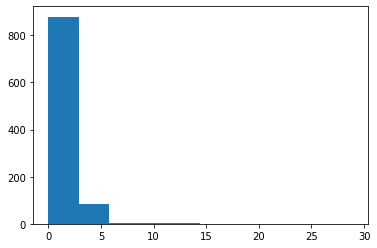

In [66]:
#check distribution of the data
plt.hist(y, bins=10)
plt.show()

In [67]:
#apply data tranformation with log transformation
y = np.log(y+1)

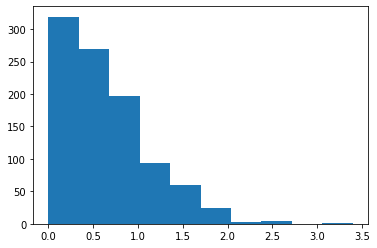

In [68]:
#check distribution of data again
plt.hist(y, bins=10)
plt.show()

In [69]:
#adding a constant (Y-intercept)
X = sm.add_constant(X)

In [70]:
#Checking multicolinearity variance inflation factor (VIF >5.0)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                 feature         VIF
0                  const  136.944621
1     StdDev_ContainWord    1.064803
2  StdDev_innovativeness    1.088986
3     Topic_Perc_Contrib    1.002367
4              UserScore    1.026778


In [71]:
#define model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)  

In [72]:
#print regression results
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             TotalSales   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.448
Date:                Thu, 24 Jun 2021   Prob (F-statistic):             0.0448
Time:                        15:36:12   Log-Likelihood:                -691.59
No. Observations:                 972   AIC:                             1393.
Df Residuals:                     967   BIC:                             1418.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37